In [390]:
## 모듈로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import math
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.neighbors import *
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.tree import plot_tree
import seaborn as sns

In [391]:
## 데이터 준비
DATAFILE = './ObesityDataSet_raw_and_data_sinthetic.csv'

In [392]:
## 데이터 로딩
healthDF = pd.read_csv(DATAFILE)
healthDF.head()

,Gender,Age,Height,Weight,BMI,SMOKE,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,24.386526,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,24.238227,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,23.765432,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,26.851852,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,28.342381,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [393]:
healthDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      2111 non-null   object 
 1   Age         2111 non-null   int64  
 2   Height      2111 non-null   float64
 3   Weight      2111 non-null   float64
 4   BMI         2111 non-null   float64
 5   SMOKE       2111 non-null   object 
 6   FAF         2111 non-null   float64
 7   TUE         2111 non-null   float64
 8   CALC        2111 non-null   object 
 9   MTRANS      2111 non-null   object 
 10  NObeyesdad  2111 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 181.5+ KB


In [394]:
## 결측치 확인
healthDF.isna().sum()

Gender        0
Age           0
Height        0
Weight        0
BMI           0
SMOKE         0
FAF           0
TUE           0
CALC          0
MTRANS        0
NObeyesdad    0
dtype: int64

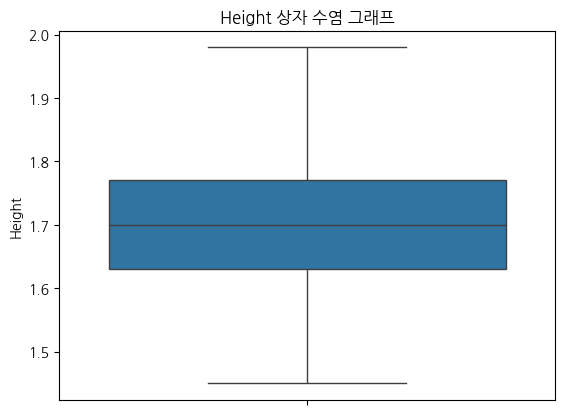

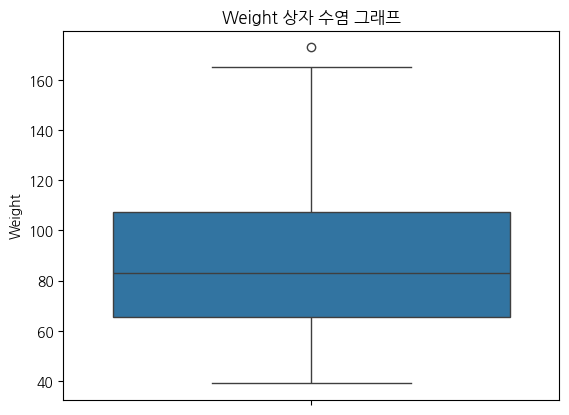

In [395]:
# [2-2] 데이터 이상치 확인 

# 박스 플롯으로 시각화
idx_list = ['Height', 'Weight']
for i in idx_list:
    sns.boxplot(healthDF[i])
    plt.title(f'{i} 상자 수염 그래프')
    plt.show()


In [396]:
# [2-3] 이상치 제거
healthDF = healthDF[healthDF['Weight'] <= 160]

In [397]:
healthDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2107 entries, 0 to 2110
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      2107 non-null   object 
 1   Age         2107 non-null   int64  
 2   Height      2107 non-null   float64
 3   Weight      2107 non-null   float64
 4   BMI         2107 non-null   float64
 5   SMOKE       2107 non-null   object 
 6   FAF         2107 non-null   float64
 7   TUE         2107 non-null   float64
 8   CALC        2107 non-null   object 
 9   MTRANS      2107 non-null   object 
 10  NObeyesdad  2107 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 197.5+ KB


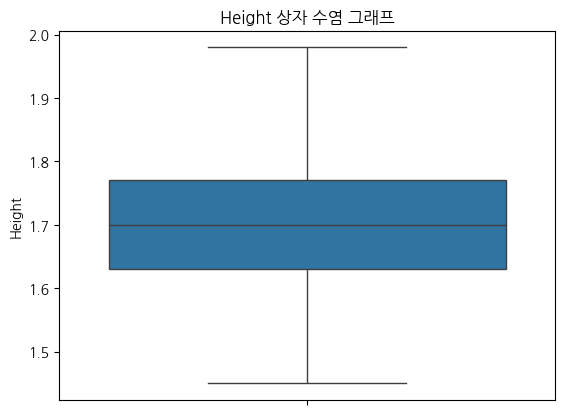

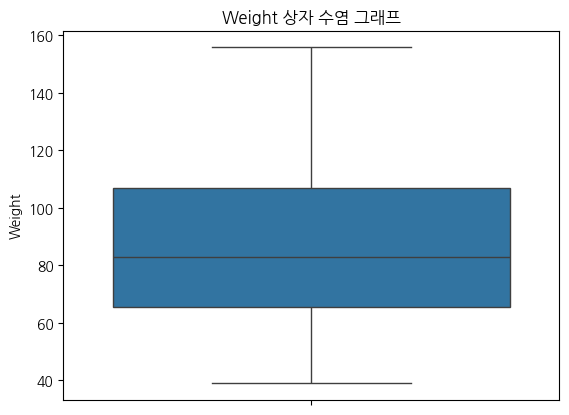

In [398]:
# [2-2] 데이터 이상치 확인 

# 박스 플롯으로 시각화
idx_list = ['Height', 'Weight']
for i in idx_list:
    sns.boxplot(healthDF[i])
    plt.title(f'{i} 상자 수염 그래프')
    plt.show()


In [399]:
# (3) 신체 활동 관련
# [6] FAF (Physical Activity Frequency) : 신체활동빈도
# [6] float64
# [7] TUE (Time Spent Using Technology) : 전자기기 사용 시간 
# [7] float64
# [9] MTRANS (Main Mode of Transportation) : 교통 수단(범주형 -> 숫자 변환) 
# [9] object : Automobile(자동차), Motorbike, Public_Transportation, Walking, Bike
#                0                  0           1                     2         3

# (4) 흡연 음주 
# [5] SMOKE : 흡연 
# [5] object : no 0 , yes 1
# [8] CALC (Alcohol Consumption Frequency) : 음주
# [8] object : no 0, Sometimes 1, Frequently 2, Always 3 

In [400]:
## object -> int 형변환

pd.set_option('future.no_silent_downcasting', True)
yesno={'no':0, 'yes':1}
healthDF['SMOKE']=healthDF.SMOKE.replace(yesno) 
healthDF['SMOKE']=healthDF['SMOKE'].astype('int') 

In [401]:
pd.set_option('future.no_silent_downcasting', True)
mtrans_edit = {'Automobile':0, 'Motorbike':0, 'Public_Transportation':1, 'Walking':2, 'Bike':3}
healthDF['MTRANS']=healthDF.MTRANS.replace(mtrans_edit)

healthDF['MTRANS']=healthDF['MTRANS'].astype('int') 

In [402]:
pd.set_option('future.no_silent_downcasting', True)
calc_edit = {'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}
healthDF['CALC']=healthDF.CALC.replace(calc_edit)

healthDF['CALC']=healthDF['CALC'].astype('int') 

In [403]:
pd.set_option('future.no_silent_downcasting', True)
calc_edit = {'Male':0, 'Female':1}
healthDF['Gender']=healthDF.Gender.replace(calc_edit)

healthDF['Gender']=healthDF['Gender'].astype('int') 

In [404]:
healthDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2107 entries, 0 to 2110
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      2107 non-null   int64  
 1   Age         2107 non-null   int64  
 2   Height      2107 non-null   float64
 3   Weight      2107 non-null   float64
 4   BMI         2107 non-null   float64
 5   SMOKE       2107 non-null   int64  
 6   FAF         2107 non-null   float64
 7   TUE         2107 non-null   float64
 8   CALC        2107 non-null   int64  
 9   MTRANS      2107 non-null   int64  
 10  NObeyesdad  2107 non-null   object 
dtypes: float64(5), int64(5), object(1)
memory usage: 197.5+ KB


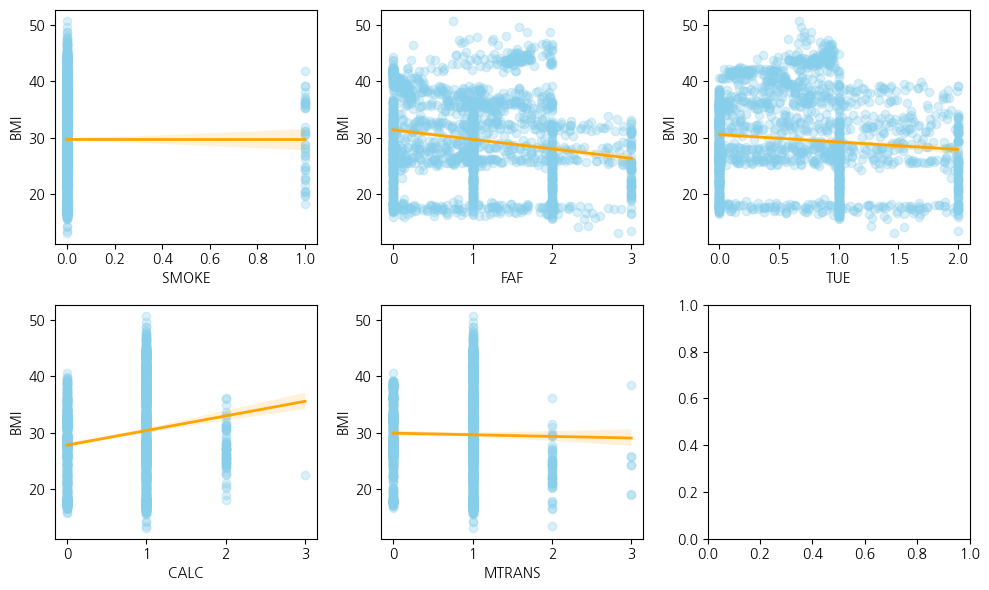

In [405]:
import seaborn as sns
# target : BMI : [4]
# feature : [5] ~ [9]
fig, axs = plt.subplots(2,3, figsize=(10,6))

lm_features = healthDF.columns[5:10]

for i, feature in enumerate(lm_features):
    row = int(i/3)
    col=i%3

    sns.regplot(x=feature, y='BMI', data=healthDF, ax=axs[row][col], 
                scatter_kws={'color':'skyblue', 'alpha':0.3},
                line_kws={'color':'orange', 'linewidth':2})
plt.tight_layout()
plt.show()


In [406]:
# int -> category 변경
healthDF['SMOKE']=healthDF['SMOKE'].astype('category')
healthDF['MTRANS']=healthDF['MTRANS'].astype('category')
healthDF['CALC']=healthDF['CALC'].astype('category')  
healthDF['Gender']=healthDF['Gender'].astype('category') 

In [407]:
healthDF.drop(['Gender', 'NObeyesdad'], axis=1).corr()['BMI'] 

Age       0.249658
Height    0.124933
Weight    0.933916
BMI       1.000000
SMOKE    -0.000258
FAF      -0.179859
TUE      -0.101060
CALC      0.168250
MTRANS   -0.017308
Name: BMI, dtype: float64

In [438]:
healthDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2107 entries, 0 to 2110
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Gender      2107 non-null   category
 1   Age         2107 non-null   int64   
 2   Height      2107 non-null   float64 
 3   Weight      2107 non-null   float64 
 4   BMI         2107 non-null   float64 
 5   SMOKE       2107 non-null   category
 6   FAF         2107 non-null   float64 
 7   TUE         2107 non-null   float64 
 8   CALC        2107 non-null   category
 9   MTRANS      2107 non-null   category
 10  NObeyesdad  2107 non-null   object  
dtypes: category(4), float64(5), int64(1), object(1)
memory usage: 140.6+ KB


In [408]:
healthDF

,Gender,Age,Height,Weight,BMI,SMOKE,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21,1.62,64.00,24.386526,0,0.00,1.000,0,1,Normal_Weight
1,1,21,1.52,56.00,24.238227,1,3.00,0.000,1,1,Normal_Weight
2,0,23,1.80,77.00,23.765432,0,2.00,1.000,2,1,Normal_Weight
3,0,27,1.80,87.00,26.851852,0,2.00,0.000,2,2,Overweight_Level_I
4,0,22,1.78,89.80,28.342381,0,0.00,0.000,1,1,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...
2106,1,21,1.71,131.41,44.940324,0,1.68,0.906,1,1,Obesity_Type_III
2107,1,22,1.75,133.74,43.670204,0,1.34,0.599,1,1,Obesity_Type_III
2108,1,23,1.75,133.69,43.653878,0,1.41,0.646,1,1,Obesity_Type_III
2109,1,24,1.74,133.35,44.044788,0,1.14,0.586,1,1,Obesity_Type_III


In [409]:
featureDF = healthDF[["SMOKE", "CALC", "Gender", "Age", "Height", "Weight"]]
targetSR = healthDF["BMI"] 

In [410]:
print(f'featureDF : {featureDF.shape}  targetSR : {targetSR.shape}')

featureDF : (2107, 6)  targetSR : (2107,)


In [416]:
## 모듈 로딩
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error 

In [417]:
## 데이터셋 분리 => 학습용 : 테스트용 = 75% : 25% 
train_X, test_X, train_y, test_y = train_test_split(featureDF, targetSR, random_state=42)

print(f'train_data => {train_X.shape} train_label => {train_X.shape}')
print(f'test_data => {test_X.shape} test_label => {test_X.shape}') 

train_data => (1580, 6) train_label => (1580, 6)
test_data => (527, 6) test_label => (527, 6)


In [418]:
## 객체 생성
knn_model = KNeighborsRegressor(n_neighbors=5)  # k=5 설정 

In [419]:
## 학습 => 학습용데이터셋 사용 : 규칙/패턴 X, 모델 없음 
knn_model.fit(train_X, train_y)

KNeighborsRegressor()

In [420]:
pre_y = knn_model.predict(train_X)
pre_y

array([28.17930059, 44.29311455, 28.47179501, ..., 27.98080379,
       32.87473087, 25.3622451 ])

In [421]:
## - 모델 성능 평가 ==> score(2D_피쳐, 1D_타겟) : 모델 적합도 
score = knn_model.score(train_X, train_y)

## - 손실 계산 평가 ==> rmse, mse, mae...(1D_타겟, 1D_예측값)
rmse = root_mean_squared_error(train_y, pre_y)

print(f'[TRAIN] score => {score} rmse => {rmse}')

[TRAIN] score => 0.973777067237191 rmse => 1.2973980763814246


In [422]:
## 테스트데이터셋으로 예측 == predict(2D_피쳐데이터)

## - 예측 결과
pre_y = knn_model.predict(test_X)

## - 모델 성능 평가 ==> score(2D_피쳐, 1D_타겟) : 모델 적합도 
score = knn_model.score(test_X, test_y)

## - 손실 계산 평가 ==> rmse, mse, mae...(1D_타겟, 1D_예측값)
rmse = root_mean_squared_error(test_y, pre_y)

print(f'[TEST] score => {score} rmse => {rmse}') 

[TEST] score => 0.9576270075465345 rmse => 1.6172508174208975


In [423]:
## - 데이터 지정
train_X.iloc[0], train_y[0] 

(SMOKE      0.00
 CALC       1.00
 Gender     1.00
 Age       19.00
 Height     1.56
 Weight    71.73
 Name: 1031, dtype: float64,
 np.float64(24.38652644))

In [424]:
train_X.head(1), train_y.head(1)

(     SMOKE CALC Gender  Age  Height  Weight
 1031     0    1      1   19    1.56   71.73,
 1031    29.474852
 Name: BMI, dtype: float64)

In [425]:
## - 이웃 찾기 : kneighbors(2D)
sample_input = [[0, 1, 0, 19.0, 1.75, 70.0]]  # 올바른 형식의 입력 데이터
distance, indices = knn_model.kneighbors(sample_input)

## - 19.0 데이터랑 거리가 가까운 K개 즉, 5개 데이터의 2D 인덱스 
print(f'distance => {distance}\n indices => {indices}, {type(indices)}')

## -> 이웃 데이터 인덱스 2D ==> 1D 
label_idx = indices.reshape(-1)
data_idx = indices 

print(f'label_idx => {label_idx} data_idx => {data_idx}')

distance => [[1.00005    1.00005    1.00019998 1.00019998 1.00079968]]
 indices => [[1293  786  426 1003  796]], <class 'numpy.ndarray'>
label_idx => [1293  786  426 1003  796] data_idx => [[1293  786  426 1003  796]]


c:\Users\kdp\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [426]:
train_y.iloc[label_idx]

262    23.120624
374    22.598140
378    23.388687
284    22.343516
450    24.280975
Name: BMI, dtype: float64

In [427]:
indices.reshape(-1,1) 

array([[1293],
       [ 786],
       [ 426],
       [1003],
       [ 796]])

In [428]:
indices.reshape(1, -1)

array([[1293,  786,  426, 1003,  796]])

In [429]:
indices.reshape(-1)

array([1293,  786,  426, 1003,  796])

In [430]:
# 최근접 이웃의 Age, Height, Weight 추출
nearest_neighbors = train_X.iloc[label_idx]  # 최근접 이웃의 데이터
nearest_bmi = train_y.iloc[label_idx]  # 최근접 이웃의 BMI 값

print(nearest_neighbors, nearest_bmi)


    SMOKE CALC Gender  Age  Height  Weight
262     0    1      0   18    1.74    70.0
374     0    1      0   18    1.76    70.0
378     0    1      0   18    1.73    70.0
284     0    1      0   20    1.77    70.0
450     0    1      0   19    1.71    71.0 262    23.120624
374    22.598140
378    23.388687
284    22.343516
450    24.280975
Name: BMI, dtype: float64


c:\Users\kdp\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


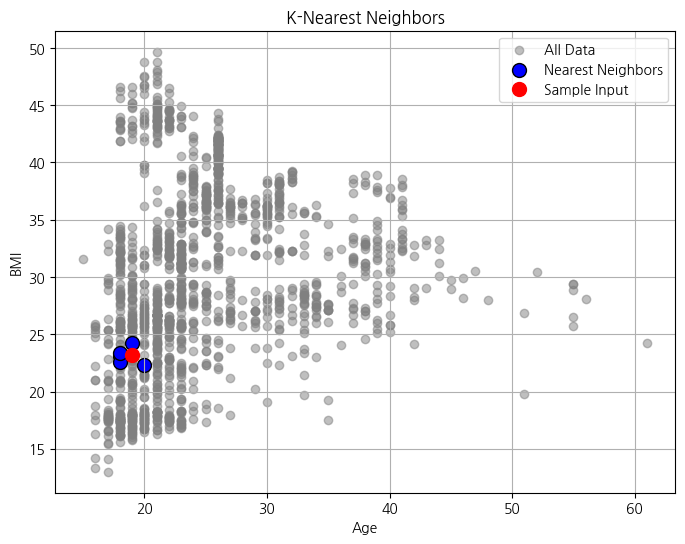

In [431]:
# 2D 시각화를 위해 Age와 BMI를 선택하여 산점도 생성
plt.figure(figsize=(8, 6))

# 전체 데이터 산점도 (배경 데이터)
plt.scatter(train_X["Age"], train_y, color="gray", alpha=0.5, label="All Data")

# 최근접 이웃 데이터
nearest_neighbors = train_X.iloc[label_idx]  # 최근접 이웃의 원본 데이터
nearest_bmi = train_y.iloc[label_idx]  # 최근접 이웃의 BMI 값

plt.scatter(nearest_neighbors["Age"], nearest_bmi, color="blue", label="Nearest Neighbors", edgecolors='black', s=100)

# 입력 샘플 (샘플 데이터 강조)
plt.scatter(sample_input[0][3], knn_model.predict(sample_input), color="red", marker="o", s=100, label="Sample Input")

# 그래프 설정
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("K-Nearest Neighbors")
plt.legend()
plt.grid(True)
plt.show() 

#### [최적의 K 찾기] <hr>
- 최근접 이웃 개수 => K
- 기본값 : 5
- 나의 데이터에 최적인 K 찾기
    * 1 ~ 전체 데이터 수만큼 K값 변경한 KNR 인스턴스 생성 
    * 학습, 예측, 성능평가, 비용계산 결과 비교 
    * 성능평가 높고, 비용계산 낮은 K 결정 

In [432]:
# 데이터 개수 
DATANUMS = train_X.shape[0]

# K 개수에 따른 모델 성능과 비용함수값 저장 
HISTORYS = [[], []]                 # [ score_list,    rmse_list ]
HISTORYS = {'score':[], 'rmse': []}

# K 개수에 따른 모델 성능 및 비용 계산 
for k in range(1, min(30, DATANUMS+1)):  # k 값 제한
    # KNR 인스턴스 생성
    model = KNeighborsRegressor(n_neighbors=k)

    # KNR 학습 및 예측 
    model.fit(train_X, train_y)
    pre_ = model.predict(train_X)

    # KNR 성능평가 및 비용계산
    score = model.score(train_X, train_y)       ## 0.0 ~ 1.0
    rmse = root_mean_squared_error(train_y, pre_)  ## 0.0 ~

    # 저장
    HISTORYS['score'].append(score)
    HISTORYS['rmse'].append(rmse)

In [433]:
print( "SCORE", min(HISTORYS['score']), max(HISTORYS['score']))
print( "rmse", min(HISTORYS['rmse']), max(HISTORYS['rmse']))

SCORE 0.9372959115720628 1.0
rmse 0.0 2.00622920527271


In [434]:
HISTORYS['score']

[1.0,
 0.9879970100982364,
 0.9822266318015922,
 0.9779510848851104,
 0.973777067237191,
 0.9707829881974455,
 0.9676668826582585,
 0.9649193794818146,
 0.9631594044558625,
 0.9606930150680775,
 0.9590837845029015,
 0.9570032425495874,
 0.9551668558671667,
 0.9533281704226966,
 0.9515404332652786,
 0.9500207478799277,
 0.9484762094819739,
 0.9468687291141653,
 0.9455578139029193,
 0.9446986230820941,
 0.9438699374182616,
 0.9428533584440355,
 0.9420247414339543,
 0.9412396716443443,
 0.940707580091791,
 0.9397733229003192,
 0.9389405959782734,
 0.9381175307394324,
 0.9372959115720628]

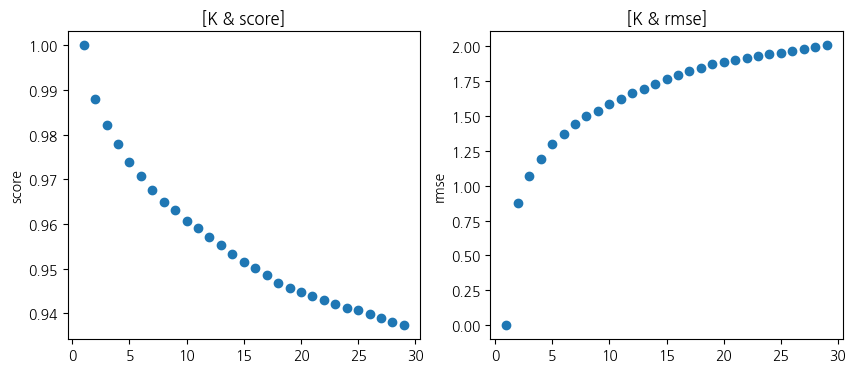

In [435]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes = axes.flatten()

for ax, ylabel in zip(axes, ["score", "rmse"]):
    ax.plot(range(1, min(30, DATANUMS+1)), HISTORYS[ylabel], 'o')
    ax.set_ylabel(ylabel)
    ax.set_title(f'[K & {ylabel}]')
plt.show()

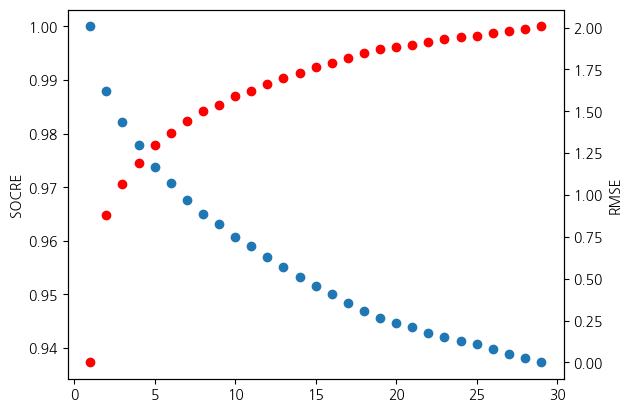

In [436]:
## - 시각화 => 이중축
fig, axes1 = plt.subplots()
axes1.plot(range(1, min(30, DATANUMS+1)), HISTORYS["score"], 'o', label='SCORE') 
axes1.set_ylabel("SOCRE")

axes2=axes1.twinx()
axes2.plot(range(1, min(30, DATANUMS+1)), HISTORYS["rmse"], 'ro', label='rmse') 
axes2.set_ylabel("RMSE")

plt.show()

In [437]:
## 예측
new_data = pd.DataFrame([[0, 1, 0, 33, 180, 73]], columns=featureDF.columns)
knn_result = knn_model.predict(new_data)
knn_result 

array([23.4784862])